## **Validación de datos y experimentos**

### importando librerias

Se importan las librerias a utilizar durate el proceso de exploración de datos, dentro de las librerias importamos **utilities**, libreria construida específicamente para propósitos de nuestro proyecto.

In [1]:
# Preparamos el entorno
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sys
import os
module_path = os.path.abspath(os.path.join('/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/', 'python_scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities import AnalisisExperimento # type: ignore

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Control de registros y consistencia entre dataframe detallada vs agrupada**

In [2]:
df_grouped_experiments = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/grouped_inf.csv", sep=",")
df_detailed_experiments = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/data_test.csv", sep=",")

In [3]:
print(df_detailed_experiments.shape)
print(df_detailed_experiments.head())
# Cantidad única de experimentos 
unique_experiments = df_detailed_experiments["experiment"].nunique()
print(f"Cantidad única de experimentos : {unique_experiments}\n")
# cantidad única de experimentos por día
experiments_per_day = df_detailed_experiments.groupby("date")["experiment"].nunique().reset_index()
print("Cantidad única de experimentos por día:")
print(experiments_per_day.to_string(index=False))

(154964, 7)
         date           experiment variant  user_id    path  \
0  2021-08-01  HideTransitionModal    6646   336575  mshops   
1  2021-08-01  HideTransitionModal    6646  3677574  mshops   
2  2021-08-01  HideTransitionModal    6647  2234611  mshops   
3  2021-08-01  HideTransitionModal    6647  3023131  mshops   
4  2021-08-01  HideTransitionModal    6647  9116431  mshops   

   purchase_funnel_flag  item_id  
0                     0        0  
1                     0        0  
2                     0        0  
3                     0        0  
4                     0        0  
Cantidad única de experimentos : 44

Cantidad única de experimentos por día:
      date  experiment
2021-08-01          43
2021-08-02          44


In [4]:
print(df_grouped_experiments.shape)
print(df_grouped_experiments.head())
# Cantidad única de experimentos 
unique_experiments = df_grouped_experiments["experiment"].nunique()
print(f"Cantidad única de experimentos : {unique_experiments}\n")
# cantidad única de experimentos por día
experiments_per_day = df_grouped_experiments.groupby("date")["experiment"].nunique().reset_index()
print("Cantidad única de experimentos por día:")
print(experiments_per_day.to_string(index=False))

(143, 7)
         date           experiment  variant  participants  purchases  \
0  2021-08-01  HideTransitionModal     6646             2          0   
1  2021-08-01  HideTransitionModal     6647             3          0   
2  2021-08-01  HideTransitionModal     6993             5          0   
3  2021-08-01  HideTransitionModal  DEFAULT            12          0   
4  2021-08-01          address_hub     3574           189        143   

   buy_rate buy_rate_percent  
0  0.000000            0.00%  
1  0.000000            0.00%  
2  0.000000            0.00%  
3  0.000000            0.00%  
4  0.756614           75.66%  
Cantidad única de experimentos : 44

Cantidad única de experimentos por día:
      date  experiment
2021-08-01          43
2021-08-02          44


In [5]:
df_grouped_experiments.experiment.value_counts()

experiment
HideTransitionModal                           8
best-seller-aa-testing-fail-fast-edition      6
carousel-v2p-above-the-fold                   6
sort-by-ranking                               6
viewItemPageMigrationDesktopReviewsNoTabs     4
viewItemPageMigrationDesktopQuotableSRV       4
viewItemPageMigrationReturns                  4
viewItemPageMigrationDesktopHirableSRV        4
web-layout-default-res                        4
recommended-products                          4
showV2V3BoxMessages                           4
show-pads-search-list                         4
show-pads-global                              4
shippingCalculatorMigrationModalExperiment    4
seller-reputation-change                      4
search-pads-none-desktop-mla                  4
results-target-web-motors                     4
remove-ecn-tag                                4
sa-on-vip                                     4
checkOnBehavior                               4
back-filters                 

In [6]:
# se calculan algunas variables adicionales, como la cantidad de participantes totales y su porcentaje de participación por día
df_grouped_experiments["buy_rate"] = df_grouped_experiments["buy_rate"].apply(lambda x: round(x, 2))
total_participants_per_day = df_grouped_experiments.groupby(['date', 'experiment'])['participants'].sum().reset_index()
total_participants_per_day.columns = ['date', 'experiment', 'total_participants']
df_grouped_experiments = df_grouped_experiments.merge(total_participants_per_day, on=['date', 'experiment'])
df_grouped_experiments['participation_percent'] = (df_grouped_experiments['participants'] / df_grouped_experiments['total_participants']) * 100

In [7]:
df_grouped_experiments[df_grouped_experiments.experiment == 'assetsCdnDomainMLA']

,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent,total_participants,participation_percent
6,2021-08-01,assetsCdnDomainMLA,DEFAULT,1766,89,0.05,5.04%,1766,100.0
77,2021-08-02,assetsCdnDomainMLA,DEFAULT,5643,413,0.07,7.32%,5643,100.0


### **validando variante DEFAULT**

En el contexto de lo revisado hasta el momento, entendemos la categoría DEFAULT como una variante que no fue exitosa al momento de generar el experimento, por lo que es necesario validar que comportamiento tiene dentro de cada uno de los experimentos planteados.

In [8]:
analyzer = AnalisisExperimento(df_grouped_experiments)
analyzer.default_count('seller-reputation-change')

,date,total_participants,total_purchases,default_participants,default_count,default_participation_percent
0,2021-08-01,1757,89,0,2,0.0
1,2021-08-02,5666,414,0,2,0.0
2,Total,7423,503,0,4,0.0


se creó una función dentro nuestra librería exclusiva de nuestro proceso **utilities**, default_count, la cual nos ayudará a validar la presencia de la variante DEFAULT para cada experimento, en el caso del experimento 'seller-reputation-change', hemos encontrado de manera exitosa que no existe DEFAULT. Si embargo, es necesario validar cada uno de los 44 experimentos y tomar una la mejor decisión, en pro de realizar un ejercicio confiable.

De esta manera definimos un límite cercano al 5%, y excluiremos la información que no cumpla con lo mencionado anteriormente.

In [9]:
experiments_with_high_default = analyzer.get_experiments_with_high_default(threshold = 5)
print(experiments_with_high_default)

['HideTransitionModal', 'assetsCdnDomainMLA', 'assetsCdnDomainMLU', 'servicesQuoteUnification']


In [10]:
#analyzer.default_count('HideTransitionModal')
analyzer.default_count('HideTransitionModal')

,date,total_participants,total_purchases,default_participants,default_count,default_participation_percent
0,2021-08-01,22,0,12,4,54.545455
1,2021-08-02,80,2,31,4,38.750000
2,Total,102,2,43,8,42.156863


HideTransitionModal es un experimento con participacion de default de más de 40%, por lo tanto no es posible tener confianza en los resulatdos en los experimentos obtenidos en estos datos, los otros 3 experimentos presentan un DEFAULT de 100%, por lo que pueden ser excluidos de nuestro analisis

In [11]:
df_grouped_experiments_00 = df_grouped_experiments[~df_grouped_experiments['experiment'].isin(experiments_with_high_default)]
df_detailed_experiments_00 = df_detailed_experiments[~df_detailed_experiments['experiment'].isin(experiments_with_high_default)]

### **Experimentos con al menos dos variantes**

Dado que la finalidad de nuestro ejercicio es llegar a validar cual de las n variantes fue mejor, seguiremos reduciendo nuestra población de estudio, considerando en este caso particular todos aquellos experimentos que tengan al menos dos variantes a comparar, la revisión para todos aquellos restantes podrá ser considerada en otro momento.

In [12]:
experiments_with_two_variants = df_grouped_experiments_00[df_grouped_experiments_00.variant!='DEFAULT'].groupby('experiment')['variant'].nunique()
experiments_with_two_variants = experiments_with_two_variants[experiments_with_two_variants >= 2].index.tolist()

In [13]:
experiments_with_two_variants

['best-seller-aa-testing-fail-fast-edition',
 'carousel-v2p-above-the-fold',
 'checkOnBehavior',
 'official-store-orders-boost',
 'recommended-products',
 'results-target-web-motors',
 'sa-on-vip',
 'search-pads-none-desktop-mla',
 'seller-reputation-change',
 'show-pads-global',
 'show-pads-search-list',
 'sort-by-ranking',
 'viewItemPageMigrationDesktopHirableSRV',
 'viewItemPageMigrationDesktopQuotableSRV',
 'web-layout-default-res']

In [14]:
df_grouped_experiments_01 = df_grouped_experiments_00[df_grouped_experiments_00['experiment'].isin(experiments_with_two_variants)]
df_detailed_experiments_01 = df_detailed_experiments_00[df_detailed_experiments_00['experiment'].isin(experiments_with_two_variants)]

In [15]:
df_detailed_experiments_01.experiment.value_counts()

experiment
sort-by-ranking                             7568
recommended-products                        7544
seller-reputation-change                    7423
carousel-v2p-above-the-fold                 6300
best-seller-aa-testing-fail-fast-edition    6049
show-pads-global                            5367
search-pads-none-desktop-mla                5255
show-pads-search-list                       5255
sa-on-vip                                   1882
official-store-orders-boost                  871
results-target-web-motors                    776
web-layout-default-res                       256
checkOnBehavior                              231
viewItemPageMigrationDesktopQuotableSRV       33
viewItemPageMigrationDesktopHirableSRV        32
Name: count, dtype: int64

### **Presencia de Usuarios en múltiples variantes**

Algo de igual forma importante para mantener la integridad de nuestros estudios, es garantizar que un usuario fue expueste exlusivamente a una única variante de los experimentos realizados, por ello seguiremos excluyendo información, y ahora excluiremos todos aquellos que no cumplan la condicion mencionada anteriormente

In [16]:
df_grouped_experiments_02 = df_grouped_experiments_01[df_grouped_experiments_01.variant != 'DEFAULT']
df_detailed_experiments_02 = df_detailed_experiments_01[df_detailed_experiments_01.variant != 'DEFAULT']

In [17]:
# identificacion de clientes para los cuales hubo más de una variante por experimento en un solo día
user_variants = df_detailed_experiments_02.groupby(['experiment', 'user_id','date'])['variant'].nunique().reset_index()
users_in_multiple_variants = user_variants[user_variants['variant'] > 1]
users_in_multiple_variants.head()

,experiment,user_id,date,variant
24,best-seller-aa-testing-fail-fast-edition,2652,2021-08-02,2
26,best-seller-aa-testing-fail-fast-edition,2759,2021-08-02,2
70,best-seller-aa-testing-fail-fast-edition,8356,2021-08-02,2
71,best-seller-aa-testing-fail-fast-edition,8621,2021-08-02,2
105,best-seller-aa-testing-fail-fast-edition,14642,2021-08-02,2


In [18]:
df_detailed_experiments_02[(df_detailed_experiments_02['user_id']==2652)&(df_detailed_experiments_02['experiment']=='best-seller-aa-testing-fail-fast-edition')]

,date,experiment,variant,user_id,path,purchase_funnel_flag,item_id
7415,2021-08-01,best-seller-aa-testing-fail-fast-edition,4515,2652,search,0,0
57986,2021-08-02,best-seller-aa-testing-fail-fast-edition,4514,2652,search,0,0
60303,2021-08-02,best-seller-aa-testing-fail-fast-edition,4515,2652,search,0,0


In [19]:
# Exclusión de los clientes y variantes identificados anteriormente
df_detailed_experiments_03 = df_detailed_experiments_02.merge(users_in_multiple_variants[['experiment', 'user_id','date']]
                                                              , on=['experiment', 'user_id','date'], how='left', indicator=True)

df_detailed_experiments_03 = df_detailed_experiments_03[df_detailed_experiments_03._merge == 'left_only']
df_detailed_experiments_03 = df_detailed_experiments_03.drop(columns=['_merge'])

In [20]:
# Traza de la información removida en el dataframe detallado
print(df_detailed_experiments.shape)
print(df_detailed_experiments_00.shape)
print(df_detailed_experiments_01.shape)
print(df_detailed_experiments_02.shape)
print(df_detailed_experiments_03.shape)

(154964, 7)
(140033, 7)
(54842, 7)
(54806, 7)
(53481, 7)


Puesto que los filtros que acabmos de realizar fueron sobre la tabla detallada, agruparemos y procesaremos nuevamente la información para llegar de nuevo a nuestros datos agrupados, pero esta vez lo haremos de una manera más precisa y confiable.

In [21]:
df_grouped_experiments_03 = df_detailed_experiments_03.groupby(['date', 'experiment', 'variant']).agg({'user_id': 'count', 'purchase_funnel_flag': 'sum'}).reset_index()
df_grouped_experiments_03 = df_grouped_experiments_03.rename(columns={"user_id": "participants" , "purchase_funnel_flag": "purchases"})
df_grouped_experiments_03['buy_rate'] = df_grouped_experiments_03['purchases']/df_grouped_experiments_03['participants']
df_grouped_experiments_03['buy_rate_percent'] = df_grouped_experiments_03['buy_rate'] .apply(lambda x: '{:.2f}%'.format(x*100))

df_grouped_experiments_03["buy_rate"] = df_grouped_experiments_03["buy_rate"].apply(lambda x: round(x, 2))
total_participants_per_day = df_grouped_experiments_03.groupby(['date', 'experiment'])['participants'].sum().reset_index()
total_participants_per_day.columns = ['date', 'experiment', 'total_participants']

# Merge the total participants with the original dataframe
df_grouped_experiments_03 = df_grouped_experiments_03.merge(total_participants_per_day, on=['date', 'experiment'])
df_grouped_experiments_03['participation_percent'] = (df_grouped_experiments_03['participants'] / df_grouped_experiments_03['total_participants']) * 100

In [22]:
# Traza de la información removida en el dataframe agrupado
print(df_grouped_experiments.shape)
print(df_grouped_experiments_00.shape)
print(df_grouped_experiments_01.shape)
print(df_grouped_experiments_02.shape)
print(df_grouped_experiments_03.shape)

(143, 9)
(129, 9)
(66, 9)
(62, 9)
(62, 9)


### **Extensiones al ejercicio**

Algunas inquietudes para las cuales no se logra dar solución en este challenge, las dejaremos en consideración para futuros desarrollos.
 * como validar población e independencia entre los experimentos, para garantizar que no haya sesgos? 
 * es posible tocar un cliente con más de un experimento por área?

### **Análisis de Resultados e Insights**

### **Experimento 1**

      date               experiment      variant participation_percent  participants buy_rate_percent  buy_rate
2021-08-01 seller-reputation-change [4552, 4553]        [21.77, 78.23]          1741   [3.43%, 5.43%]     0.040
2021-08-02 seller-reputation-change [4552, 4553]        [19.05, 80.95]          5534   [8.44%, 7.03%]     0.075

Índice de Estabilidad de Población (PSI) entre el primer y segundo vector: 0.004559923546430123


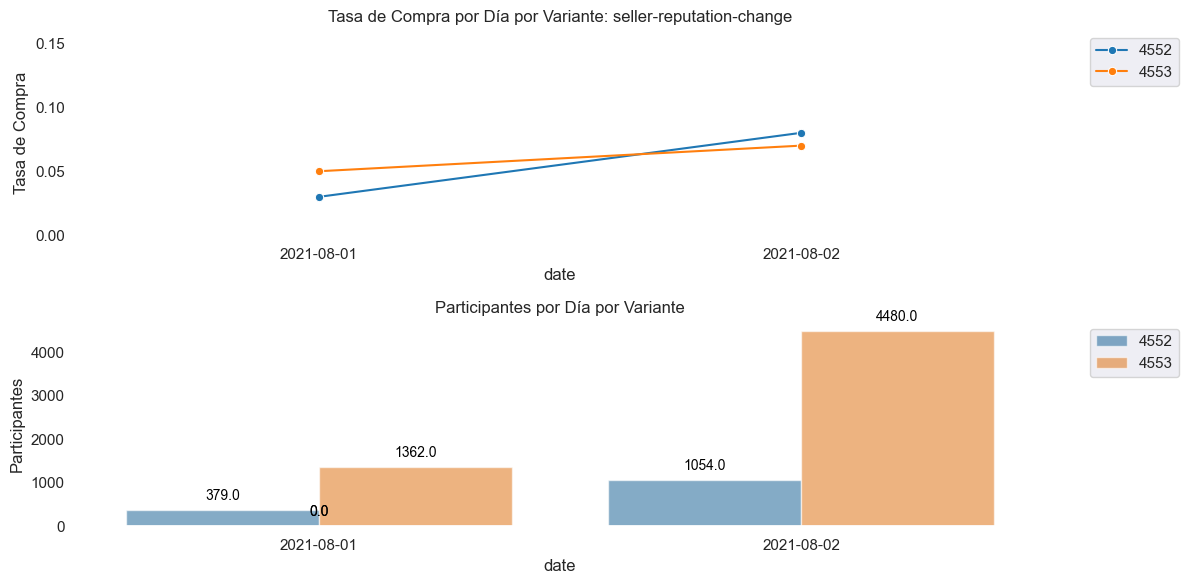

In [23]:
analyzer = AnalisisExperimento(df_grouped_experiments_03)
analyzer.analisis_experimento('seller-reputation-change')

In [24]:
AB_test_data = AnalisisExperimento(df_detailed_experiments)
AB_test_data.ab_test_discreto('seller-reputation-change')

+-----------+-----------------------+-----------------+-------------------+-----------------+
|   variant | concentration         |   average_value |   prob_being_best |   expected_loss |
+===========+=======================+=================+===================+=================+
|      4552 | {0: 1400.0, 1: 107.0} |       0.071002  |           0.72615 |       0.0012159 |
+-----------+-----------------------+-----------------+-------------------+-----------------+
|      4553 | {0: 5520.0, 1: 396.0} |       0.0669371 |           0.27385 |       0.0056855 |
+-----------+-----------------------+-----------------+-------------------+-----------------+


In [25]:
AB_test_data.ab_test_binario('seller-reputation-change')

+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|   variant |   totals |   positives |   positive_rate |   posterior_mean |   prob_being_best |   expected_loss |
+===========+==========+=============+=================+==================+===================+=================+
|      4552 |     1507 |         107 |         0.071   |          0.07129 |           0.71505 |       0.0012675 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|      4553 |     5916 |         396 |         0.06694 |          0.06701 |           0.28495 |       0.0055495 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+


Análisis experimento **seller-reputation-change**

 * **Tasa de Compra el 2021-08-01**:
 La variante 4553 tiene una tasa de compra más alta (5.43%) en comparación con la variante 4552 (3.43%).

 * **Tasa de Compra el 2021-08-02**:
 La variante 4552 tiene una tasa de compra más alta (8.44%) en comparación con la variante 4553 (7.03%).

**Observaciones y Recomendaciones**

Hay una variabilidad significativa en la tasa de compra entre los dos días. La variante 4553 tuvo un mejor rendimiento el primer día, mientras que la variante 4552 fue superior el segundo día.

**1. Probabilidad de ser la Mejor**:Aunque la tasa de compra varía entre los días, la variante 4552 tiene una mayor probabilidad general de ser la mejor (71.88%).
Pérdida Esperada:

**2. La pérdida esperada** es menor para la variante 4552, sugiriendo que es una opción menos riesgosa a largo plazo.

Finalmente, y dado que la variante 4552 muestra una mayor probabilidad de ser la mejor y una menor pérdida esperada, se recomienda considerarla como la variante preferida, aunque se debe tener en cuenta la variabilidad observada entre los días.

***se recomienda***
Considerar una implementación más amplia de la variante 4552, pero sigue monitoreando el rendimiento. Investigar las posibles causas de la variabilidad en la tasa de compra entre los días para entender mejor el comportamiento de los usuarios. Continúa monitoreando las métricas clave para asegurar la consistencia en el rendimiento.

### **Experimento 2**

      date                  experiment      variant participation_percent  participants buy_rate_percent  buy_rate
2021-08-01 official-store-orders-boost [4313, 4314]        [44.86, 55.14]           185   [6.02%, 2.94%]     0.045
2021-08-02 official-store-orders-boost [4313, 4314]        [47.21, 52.79]           682   [2.17%, 1.11%]     0.015

Índice de Estabilidad de Población (PSI) entre el primer y segundo vector: 0.0022234015568666013


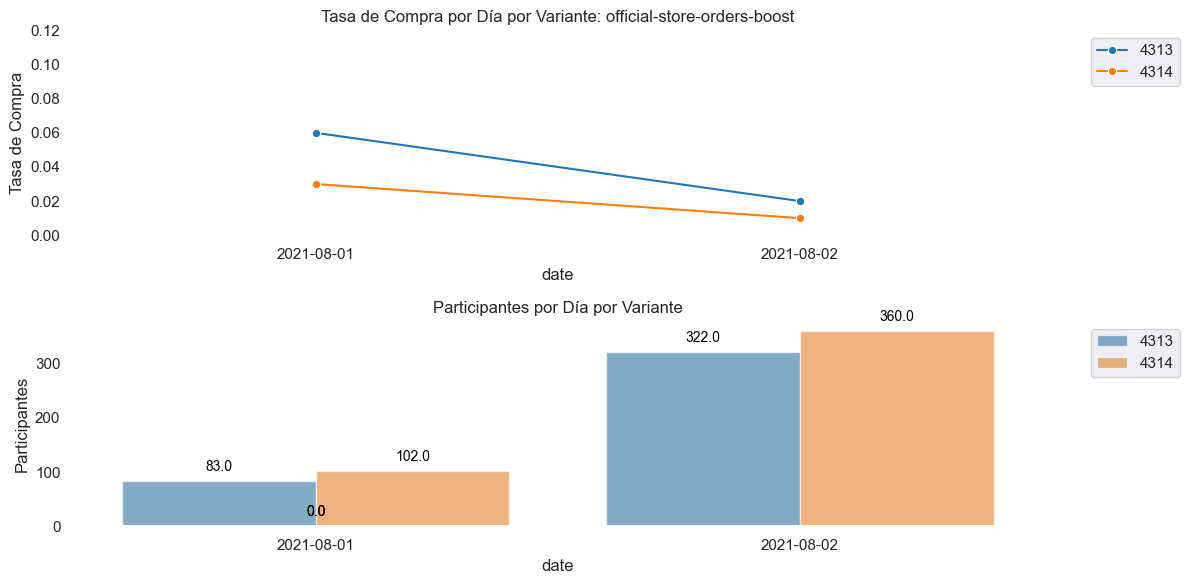

In [30]:
analyzer.analisis_experimento('official-store-orders-boost')

In [31]:
AB_test_data.ab_test_binario('official-store-orders-boost')

+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|   variant |   totals |   positives |   positive_rate |   posterior_mean |   prob_being_best |   expected_loss |
+===========+==========+=============+=================+==================+===================+=================+
|      4313 |      407 |          12 |         0.02948 |          0.03064 |           0.92295 |       0.0003454 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|      4314 |      464 |           7 |         0.01509 |          0.01613 |           0.07705 |       0.0148401 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+


Análisis experimento **official-store-orders-boost**

Tasa de Compra el 2021-08-01:
La variante 4313 tiene una tasa de compra más alta (6.02%) en comparación con la variante 4314 (2.94%).

Tasa de Compra el 2021-08-02:
La variante 4313 tiene una tasa de compra más alta (2.17%) en comparación con la variante 4314 (1.11%).

Observaciones y Recomendaciones

Hay una variabilidad en la tasa de compra entre los dos días. En ambos días, la variante 4313 mostró una tasa de compra más alta que la variante 4314.

1. Probabilidad de ser la Mejor:
La variante 4313 tiene una probabilidad del 92.29% de ser la mejor, lo cual es considerablemente alto. Esto sugiere que la variante 4313 podría ser más efectiva en impulsar las ventas.

2. Pérdida Esperada:
La pérdida esperada asociada a la variante 4313 es menor que la de la variante 4314, lo cual sugiere que optar por la variante 4313 conlleva menos riesgo financiero.

Dado que la variante 4313 muestra una mayor probabilidad de ser la mejor y una menor pérdida esperada, se recomienda considerarla como la variante preferida.

Se recomienda

Considerar una implementación más amplia de la variante 4313, pero sigue monitoreando el rendimiento.
Analizar la variabilidad en la tasa de compra entre los días para entender mejor el comportamiento de los usuarios.
Continuar monitoreando las métricas clave para asegurar la consistencia en el rendimiento.

In [28]:
df_grouped_experiments_03.sort_values(by='experiment')

,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent,total_participants,participation_percent
0,2021-08-01,best-seller-aa-testing-fail-fast-edition,4514,690,27,0.04,3.91%,1379,50.036258
1,2021-08-01,best-seller-aa-testing-fail-fast-edition,4515,689,36,0.05,5.22%,1379,49.963742
32,2021-08-02,best-seller-aa-testing-fail-fast-edition,4515,2248,137,0.06,6.09%,4482,50.156180
31,2021-08-02,best-seller-aa-testing-fail-fast-edition,4514,2234,151,0.07,6.76%,4482,49.843820
2,2021-08-01,carousel-v2p-above-the-fold,6786,684,56,0.08,8.19%,1415,48.339223
3,2021-08-01,carousel-v2p-above-the-fold,6787,731,58,0.08,7.93%,1415,51.660777
33,2021-08-02,carousel-v2p-above-the-fold,6786,2368,252,0.11,10.64%,4585,51.646674
34,2021-08-02,carousel-v2p-above-the-fold,6787,2217,240,0.11,10.83%,4585,48.353326
36,2021-08-02,checkOnBehavior,349,89,8,0.09,8.99%,188,47.340426
35,2021-08-02,checkOnBehavior,348,99,3,0.03,3.03%,188,52.659574
